# NumPy

S. 89

- ndarray


In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# Efficiency of ndarrays

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
# https://docs.python.org/3/library/stdtypes.html?highlight=range#range 

my_nparray = np.arange(1000000)
my_list = list(range(1000000))
my_nparray

array([     0,      1,      2, ..., 999997, 999998, 999999])

## Timing Difference

- range... https://www.w3schools.com/python/ref_func_range.asp
- _ ... https://hackernoon.com/understanding-the-underscore-of-python-309d1a029edc
- print("...", end='...') ... ignores "Newline"

Wird quasi 10 mal durchlaufen

In [3]:
%time for _ in range(10): my_array = my_nparray*2

Wall time: 25 ms


In [4]:
%time for _ in range(10): my_list2 = [ x * 2 for x in my_list ]

Wall time: 1.06 s


In [5]:
t_start = time.time()
print ("Start Execution : ") 
print (time.ctime()) 

for _ in range(10): my_array = my_nparray*2
    
t_end = time.time()
print ("Stop Execution : ",end="") 
print (t_end) 

print ("Time-Difference:", end=' ')
print (t_end-t_start)

Start Execution : 
Sun Jul  7 16:20:53 2019
Stop Execution : 1562509253.4725492
Time-Difference: 0.0300905704498291


In [6]:
t_start = time.time()
print ("Start Execution : ") 
print (time.ctime()) 

for _ in range(10): my_list2 = [ x * 2 for x in my_list ]
    
t_end = time.time()
print ("Stop Execution : ",end="") 
print (t_end) 

print ("Time-Difference:", end=' ')
print (t_end-t_start)

Start Execution : 
Sun Jul  7 16:20:53 2019
Stop Execution : 1562509254.547484
Time-Difference: 1.0649387836456299


## Array Objekt

- container (generisch, mehrdimensional)
- dtype
- shape

In [7]:
data = np.random.randn(2,3)
data

array([[-0.77381054, -0.21272443, -1.26178267],
       [ 0.01382636,  0.74031463, -1.32704306]])

In [8]:
data*2

array([[-1.54762108, -0.42544885, -2.52356535],
       [ 0.02765271,  1.48062926, -2.65408613]])

In [9]:
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

### Erzeugen von ndarrays

**Allgemeine ndarrays**

In [11]:
data1 = [1,7,5,91]
arr1 = np.array(data1)
arr1
print("type(data1): ", type(data1))
print("type(array1): ",type(arr1))
print("dtype: ", arr1.dtype)


array([ 1,  7,  5, 91])

type(data1):  <class 'list'>
type(array1):  <class 'numpy.ndarray'>
dtype:  int32


In [12]:
data2 = ([1,2,3],[4.1,5.2,768])
arr2 = np.array(data2)

data2
print("type: ", type(data2))
print("len: ", len(data2))

arr2
print("type: ", type(arr2))
print("shape: ", arr2.shape)
print("dtype: ", arr2.dtype)

([1, 2, 3], [4.1, 5.2, 768])

type:  <class 'tuple'>
len:  2


array([[  1. ,   2. ,   3. ],
       [  4.1,   5.2, 768. ]])

type:  <class 'numpy.ndarray'>
shape:  (2, 3)
dtype:  float64


In [13]:
arr_test = np.array([[1,2,3],[4,5,6.0,5]])
arr_test


array([list([1, 2, 3]), list([4, 5, 6.0, 5])], dtype=object)

**zeroes, ones, empty**

In [14]:
np.zeros(10)
np.ones((4,2,3))

emp = np.empty((2,3,2,4))
#emp
print("shape: ", emp.shape)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

shape:  (2, 3, 2, 4)


### Casting
Umwandeln von Datentypen

In [15]:

arr3 = np.array([[2,3,4],[5,63,1]])
#arr3
#arr3.shape
arr3.dtype
arr4 = arr3.astype(np.float64)
arr4
arr4.dtype


dtype('int32')

array([[ 2.,  3.,  4.],
       [ 5., 63.,  1.]])

dtype('float64')

### Rechnen mit nparrays
- komponentenweise
- auch boolsche Vergleiche möglich

In [16]:
arr5 = np.array([[1,2,3],[4,5,6.0]]); arr5
arr5 / 2
arr6 = np.array([[3,1,5],[7,1,1.3]]); arr6
arr5 < arr6

array([[1., 2., 3.],
       [4., 5., 6.]])

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

array([[3. , 1. , 5. ],
       [7. , 1. , 1.3]])

array([[ True, False,  True],
       [ True, False, False]])

### Indizieren & Slicing
- Views (numpy legt keine Kopien an!)
- mehrndimensionale Indizierung


In [17]:
arr7 = np.arange(10); arr7
arr7[3:6]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([3, 4, 5])

In [18]:
arr_slice1 = arr7[1:4]; arr_slice1
arr_slice1[1:3] = 41
arr_slice1

arr7
# wurde als auf original angewendet (keine kopie erstellt!!!)

array([1, 2, 3])

array([ 1, 41, 41])

array([ 0,  1, 41, 41,  4,  5,  6,  7,  8,  9])

In [19]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d
arr3d.shape

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

(2, 2, 3)

In [20]:
arr3d[1,0]

x = arr3d[0]
x
y = x[1]
y

array([7, 8, 9])

array([[1, 2, 3],
       [4, 5, 6]])

array([4, 5, 6])

## Programmieren mit Arrays 

In [21]:
points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points, points)


xs.dtype
xs.shape
ys

z = np.sqrt(xs**2 + ys**2)

dtype('float64')

(1000, 1000)

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [22]:
#  ?np.meshgrid

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

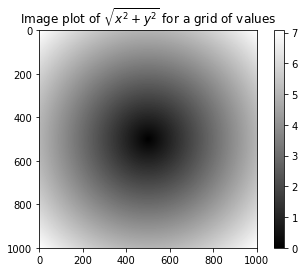

In [23]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title('Image plot of $\sqrt{x^2+y^2}$ for a grid of values')

## Bedingte Logik!
- wichtige Beispiele: negative Werte ersetzen

In [24]:
arr8 = np.random.randn(4,4)
arr8
arr8 > 0

array([[-1.71698485,  0.70102462, -0.80573142, -1.77131604],
       [-1.4571583 , -0.12260674, -0.53742538, -0.2781827 ],
       [ 0.76151492,  2.10886137,  0.23929375, -0.21105201],
       [ 0.84816997,  1.22463438, -0.7799023 , -0.23781242]])

array([[False,  True, False, False],
       [False, False, False, False],
       [ True,  True,  True, False],
       [ True,  True, False, False]])

In [25]:
np.where(arr8 < 0,-1 ,arr8)

array([[-1.        ,  0.70102462, -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        ],
       [ 0.76151492,  2.10886137,  0.23929375, -1.        ],
       [ 0.84816997,  1.22463438, -1.        , -1.        ]])

## Statistische und mathematische Methoden
- Aggregation 
 - mean
 - sum
 - std
- Kumuative Werte
 - cumcum
 - cumprod

In [26]:
arr8
print('Mittelwert: ', arr8.mean())
print('Standardabweichung: ',arr8.std())
print('Summe: ',arr8.sum())

print('')
print('Summe entlang der Spalten: ', arr8.sum(axis=0))
print('Summe entlang der Zeilen: ', arr8.sum(axis=1))

array([[-1.71698485,  0.70102462, -0.80573142, -1.77131604],
       [-1.4571583 , -0.12260674, -0.53742538, -0.2781827 ],
       [ 0.76151492,  2.10886137,  0.23929375, -0.21105201],
       [ 0.84816997,  1.22463438, -0.7799023 , -0.23781242]])

Mittelwert:  -0.1271670736395917
Standardabweichung:  1.0453760316436174
Summe:  -2.0346731782334673

Summe entlang der Spalten:  [-1.56445826  3.91191362 -1.88376535 -2.49836318]
Summe entlang der Zeilen:  [-3.59300769 -2.39537313  2.89861802  1.05508962]


In [27]:
arr9 = np.array([[0,1,2],[3,4,5],[6,7,8]]); arr9
print('Kumulative Summe über Spalten: ', arr9.cumsum(axis=0))

print('')
print('Kumulative Summe über Zeilen: ', end='')
arr9.cumsum(axis=1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Kumulative Summe über Spalten:  [[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]

Kumulative Summe über Zeilen: 

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

**Random Walk Example**

In [28]:
import random
position = 0
walk = [position] # generate list
steps = 1000

t_start = time.time()
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)   
t_end = time.time()

print ("Time-Difference:", end=' ')
print (t_end-t_start)

Time-Difference: 0.004536867141723633


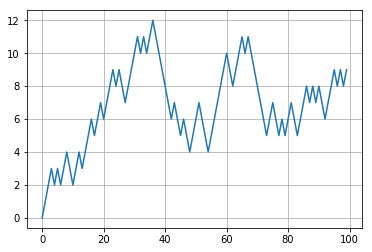

In [29]:
plt.plot(walk[:100])
plt.grid()

In [30]:
# Alternative ohne Schleife

t_start2 = time.time()
nstep = 1000
draws = np.random.randint(0,2, size=nstep)    # 1000 randomzahlen 0 oder 1
steps = np.where(draws > 0, 1, -1)            # 0 wird -1 zugewiesen
walk = steps.cumsum()                         # Kumulative Summe
t_end2 = time.time()

print ("Time-Difference:", end=' ')
print (t_end2-t_start2)
walk.min()
walk.max()

Time-Difference: 0.0


-3

27

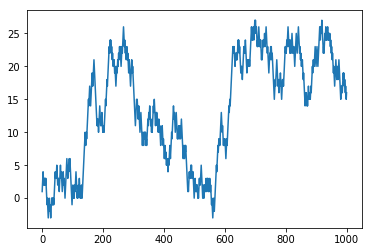

In [31]:
plt.plot(walk)